---
# Estudos com PySpark
---

#### Criado por: **Jodavid Ferreira**
#### Data de criação: 02.07.2021

---

#### Objetivo:

Avançar com os estudos utilizando as técnicas que utilizo no dia-a-dia, entretanto com o Spark e python;

---

#### Data da última atualização: 03.07.2021

---

## 1. Instalando a biblioteca pyspark
---

In [1]:
# ------------------------------------
# Instalando a biblioteca pyspark
# No terminal:
# ------------
# pip install pyspark
# -----------------

## 2. Importando as bibliotecas necessárias
---

In [2]:
# ------------------------------------
# Importanto as bibliotecas
# -----------------
from pyspark.sql import SparkSession
#----------
from pyspark.sql.functions import col, skewness, kurtosis # Para assimetria e Curtose
#----------
import numpy as np # Importanto Numpy
#----------
import matplotlib.pyplot as plt # Importanto Numpy
#----------
import seaborn as sns # Importando Seaborn
# -----------------

---
### 2.1 Iniciando uma sessão do SPARK
---

In [4]:
# ------------------------------------
# Iniciando uma sessão do Spark
# ----
# obs:
# appName: Nome do app para a sessão
# -----------------
spark = SparkSession \
        .builder \
        .appName("Estudos com Spark - Jodavid Ferreira") \
        .config("spark.some.config.option", "some-value") \
        .getOrCreate()
# -----------------

---
### 2.2 Criando um banco de dados dentro do python
---

In [5]:
## ------------------------------------
## Criando um banco de dados dentro do python
## ----
## dimensão: 4 colunas e 3 linhas;
## -----------------
#df = spark.sparkContext\
#        .parallelize([(1, 2, 3, 'a b c'),
#                      (4, 5, 6, 'd e f'),
#                      (7, 8, 9, 'g h i')])\
#        .toDF(['col1', 'col2', 'col3','col4'])
## -----------------

---
### 2.3 Lendo um arquivo com extensão 'Parquet'
---

##### Base de dados : "userdata"

* Informações sobre a Base de dados:
    * Possui 5.000 linhas;
    * Possui 13 variáveis:
        1.		registration_dttm |	timestamp
        2.		id 		|	int
        3.		first_name 	|	string
        4.		last_name 	|	string
        5.		email 		|	string
        6.		gender 		|	string
        7.		ip_address 	|	string
        8.		cc 		|	string
        9.		country 	|	string
        10.		birthdate 	|	string
        11.		salary 		|	double
        12.		title 		|	string
        13.		comments 	|	string
 ---

In [6]:
# ------------------------------------
# Ler dados com extensão Parquet
# ----
# localização da base de dados:
# ../banco de dados - exemplo/userdata/
# ----
# Número de linhas: 5000
# -----------------
dados = spark.read.parquet("../banco de dados - exemplo/userdata/")
# -----------------

In [7]:
# ------------------------------------
# Verificando a quantidade de linhas
# -----------------
dados.count()
# -----------------

5000

In [8]:
# ------------------------------------
# Verificando as colunas
# -----------------
dados.printSchema()
# -----------------

root
 |-- registration_dttm: timestamp (nullable = true)
 |-- id: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- email: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- ip_address: string (nullable = true)
 |-- cc: string (nullable = true)
 |-- country: string (nullable = true)
 |-- birthdate: string (nullable = true)
 |-- salary: double (nullable = true)
 |-- title: string (nullable = true)
 |-- comments: string (nullable = true)



In [9]:
# ------------------------------------
# Mostrando as 20 linhas da variável
# "first_name"
# -----------------
dados.select("first_name").show()
# -----------------

+----------+
|first_name|
+----------+
|    Amanda|
|    Albert|
|    Evelyn|
|    Denise|
|    Carlos|
|   Kathryn|
|    Samuel|
|     Harry|
|      Jose|
|     Emily|
|     Susan|
|     Alice|
|    Justin|
|     Kathy|
|   Dorothy|
|     Bruce|
|     Emily|
|   Stephen|
|  Clarence|
|   Rebecca|
+----------+
only showing top 20 rows



In [10]:
dados.show(2,True)

+-------------------+---+----------+---------+----------------+------+--------------+----------------+---------+---------+---------+----------------+--------+
|  registration_dttm| id|first_name|last_name|           email|gender|    ip_address|              cc|  country|birthdate|   salary|           title|comments|
+-------------------+---+----------+---------+----------------+------+--------------+----------------+---------+---------+---------+----------------+--------+
|2016-02-03 04:55:29|  1|    Amanda|   Jordan|ajordan0@com.com|Female|   1.197.201.2|6759521864920116|Indonesia| 3/8/1971| 49756.53|Internal Auditor|   1E+02|
|2016-02-03 14:04:03|  2|    Albert|  Freeman| afreeman1@is.gd|  Male|218.111.175.34|                |   Canada|1/16/1968|150280.17|   Accountant IV|        |
+-------------------+---+----------+---------+----------------+------+--------------+----------------+---------+---------+---------+----------------+--------+
only showing top 2 rows



---
## 3 Análise Exploratória - Descritiva
---

In [11]:
# ------------------------------------
# Selecionando as colunas para análise
# A única variável do banco que é numérica é 
# salary"
# -----------------
colunas_selecionadas = ["salary"]
# ------
dados.select(colunas_selecionadas).describe().show()

+-------+-----------------+
|summary|           salary|
+-------+-----------------+
|  count|             4689|
|   mean|150772.2228897419|
| stddev|78171.51306234104|
|    min|         12068.96|
|    max|        286735.82|
+-------+-----------------+



In [12]:
# ------------------------------------
# Assimetria e Curtose
# -----------------
colunas_selecionadas = "salary"
# ------
dados.select(skewness(colunas_selecionadas),kurtosis(colunas_selecionadas)).show()
# ------

+--------------------+-------------------+
|    skewness(salary)|   kurtosis(salary)|
+--------------------+-------------------+
|-0.01515158775612...|-1.1670881267541617|
+--------------------+-------------------+



### 3.1 Fazendo um Histograma
---

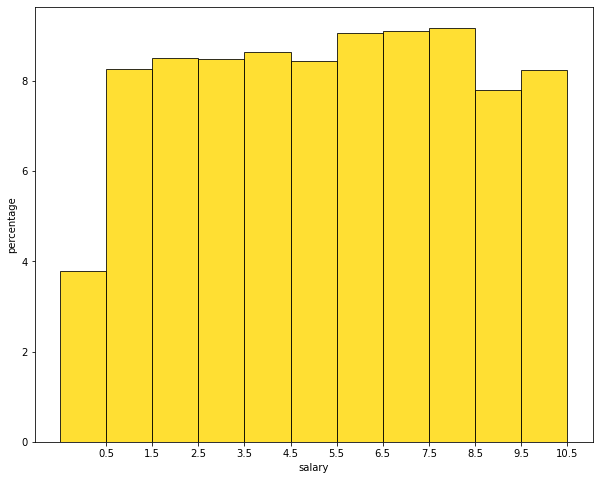

In [13]:
# ------------------------------------
# Gerando um histograma
# -----------------
colunas_selecionadas = "salary"
# ------
plot_data = dados.select(colunas_selecionadas).toPandas()
x = plot_data[colunas_selecionadas]
bins = np.arange(0, 287000, 25000.0)
# ------
hist, bin_edges = np.histogram(x,bins,weights=np.zeros_like(x) + 100. / x.size) # make the histogram
# -----
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
#-----
# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1,alpha=0.8,ec ='black',color = 'gold')
#-----
# Set the ticks to the middle of the bars
ax.set_xticks([0.5+i for i,j in enumerate(hist)])
#-----
# Set the xticklabels to a string that tells us what the bin edges were
labels =['{}'.format(bins[i+1]) for i,j in enumerate(hist)]
labels.insert(0,'0')
#-----
plt.xlabel(colunas_selecionadas)
plt.ylabel('percentage')
plt.show()

### 3.2 Fazendo um BoxPlot
---

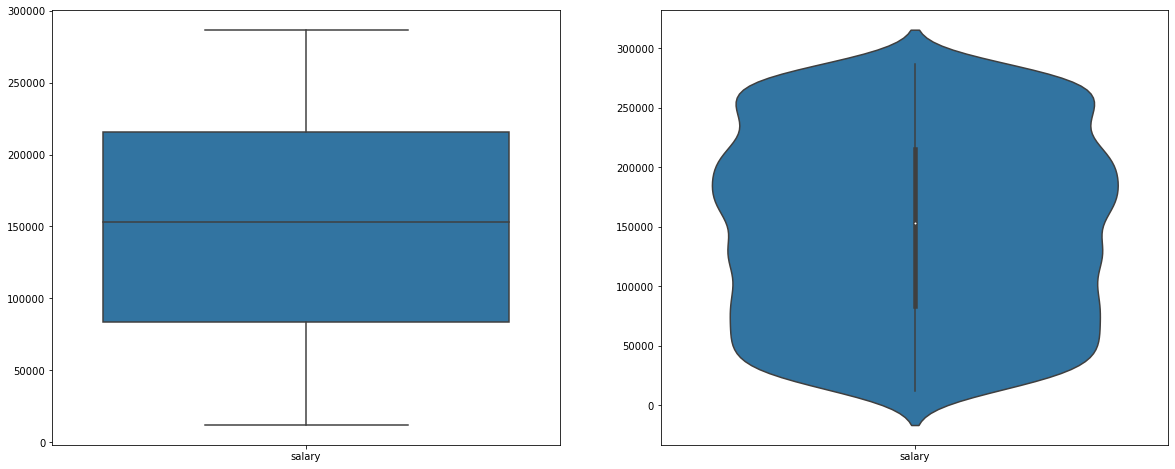

In [14]:
# ------------------------------------
# Gerando um BoxPlot
# -----------------
colunas_selecionadas = "salary"
# ------
x = dados.select(colunas_selecionadas).toPandas()
#-----
fig = plt.figure(figsize=(20, 8))
#-----
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)
ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)

### 3.3 Fazendo um agrupamento e gráfico de barras
---

In [52]:
# ------------------------------------
# Tabela de Frequencias e
# Gráfico de Barras
# -------
# Funções Necessárias
from pyspark.sql import functions as F
from pyspark.sql.functions import rank, sum, col
from pyspark.sql import Window
# -------
window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)
# --
DadosAgrupados = dados.select(['gender', 'salary']).\
    groupBy('gender').\
    agg(F.count('salary').alias('salary_num'),
        F.mean('salary').alias('salary_mean'),
        F.min('salary').alias('salary_min'),
        F.max('salary').alias('salary_max')).\
    withColumn('total', sum(col('salary_num')).over(window)).\
    withColumn('Percent', col('salary_num')*100/col('total')).\
    drop(col('total')
    )
# --


In [53]:
DadosAgrupados.show()


+------+----------+------------------+----------+----------+----------------+
|gender|salary_num|       salary_mean|salary_min|salary_max|         Percent|
+------+----------+------------------+----------+----------+----------------+
|Female|      2391|147013.72066499369|  12121.98| 286735.82|50.9916826615483|
|  Male|      2298|154682.83160139245|  12068.96| 286388.01|49.0083173384517|
|      |         0|              null|      null|      null|             0.0|
+------+----------+------------------+----------+----------+----------------+



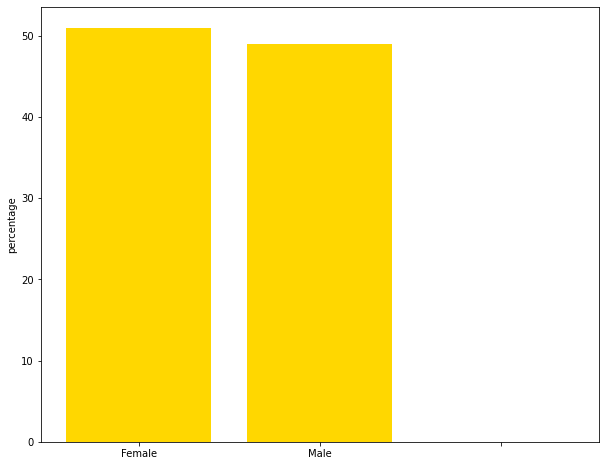

In [54]:
# ------------------------------------
# Bar Plot - para os dados agrupados
# ----------------
plot_data = DadosAgrupados.toPandas()
# ----------------
labels = plot_data.gender
missing = plot_data.Percent
ind = [x for x, _ in enumerate(labels)]
# ---------
plt.figure(figsize=(10,8))
plt.bar(ind, missing, width=0.8, label='missing', color='gold')

plt.xticks(ind, labels)
plt.ylabel("percentage")
plt.show()
